In [7]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [8]:
# Get the dataset labels using the dataset folder
labels = os.listdir('data')
labels

['Open', 'no_yawn', 'yawn', 'Closed']

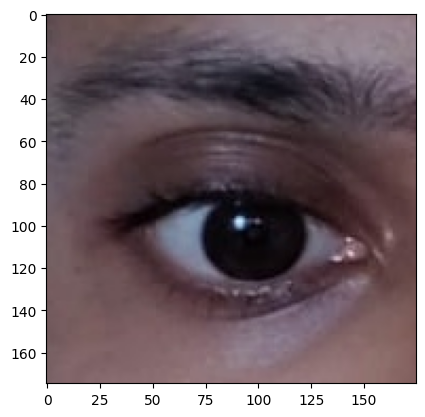

In [10]:
plt.imshow(plt.imread('data/Open/_0.jpg'))